In [1]:
# Import thư viện: 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
# Đọc dữ liệu:
covid_df = pd.read_csv('../data/modified/Modified_March_06_2023_corona_data.csv')
covid_df.head(5)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,...,Total tests,Tests/1M pop,Population,Continent,1 Case every X ppl,1 Death every X ppl,1 Test every X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,USA,105396817.0,0.0,1146740.0,0.0,102864696.0,0.0,1385381.0,2726.0,314800.0,...,1.167686e+09,3487657.0,3.348053e+08,North America,3.0,292.0,0.0,0.0,0.0,4138.0
1,India,44688101.0,0.0,530775.0,0.0,44154425.0,0.0,2901.0,0.0,31770.0,...,9.191891e+08,653468.0,1.406632e+09,Asia,31.0,2650.0,2.0,0.0,0.0,2.0
2,France,39638159.0,0.0,165030.0,0.0,39400459.0,706.0,72670.0,869.0,604383.0,...,2.714902e+08,4139547.0,6.558452e+07,Europe,2.0,397.0,0.0,0.0,0.0,1108.0
3,Germany,38210850.0,0.0,168397.0,0.0,37767300.0,17500.0,275153.0,0.0,455522.0,...,1.223324e+08,1458359.0,8.388360e+07,Europe,2.0,498.0,1.0,0.0,0.0,3280.0
4,Brazil,37076053.0,0.0,699276.0,0.0,36249161.0,0.0,127616.0,0.0,172164.0,...,6.377617e+07,296146.0,2.153536e+08,South America,6.0,308.0,3.0,0.0,0.0,593.0


In [14]:
continent_covid = covid_df.groupby("Continent").sum()
continent_covid

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total tests,Tests/1M pop,Population,1 Case every X ppl,1 Death every X ppl,1 Test every X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
Continent,,,,,,,,,,,,,,,,,,,
Africa,12796584.0,13.0,258593.0,0.0,10958582.0,11.0,366328.0,548.0,2486420.0,18504.0,1.107283e+08,10908075.0,1.406729e+09,82740.0,2122801.0,1568.0,2.0,0.00,576722.40
Asia,214523214.0,17000.0,1537601.0,114.0,182369187.0,22761.0,13457934.0,1669.0,7744105.0,34589.0,2.375423e+09,92863694.0,4.711357e+09,7876.0,894479.0,468.0,483.9,3.07,322402.99
Australia/Oceania,14027245.0,1634.0,26221.0,3.0,13804048.0,1281.0,71359.0,55.0,4581024.0,8758.0,8.855292e+07,20810938.0,4.347041e+07,624.0,97415.0,61.0,334.0,0.60,939237.00
Europe,246596854.0,17979.0,2019501.0,90.0,242049974.0,37440.0,2245993.0,2752.0,18626410.0,124830.0,2.824543e+09,212903665.0,7.475438e+08,187.0,23446.0,22.0,559.0,7.00,1348632.00
North America,124727721.0,525.0,1612602.0,4.0,119887065.0,4442.0,2324721.0,3094.0,8812064.0,58281.0,1.304727e+09,101381898.0,5.981409e+08,987.0,77301.0,133.0,4.0,0.03,2755168.00
South America,68048799.0,0.0,1350941.0,0.0,65553207.0,0.0,275065.0,1867.0,2587143.0,32982.0,2.425919e+08,13890196.0,4.376944e+08,146.0,10125.0,32.0,0.0,0.00,342753.00
Unknown,721.0,0.0,15.0,0.0,706.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.00,0.00


In [42]:
df = covid_df["Continent"].unique()
df[0]

'North America'

In [43]:
covid_df[covid_df["Continent"] == "North America"] 


,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,...,Total tests,Tests/1M pop,Population,Continent,1 Case every X ppl,1 Death every X ppl,1 Test every X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,USA,105396817.0,0.0,1146740.0,0.0,102864696.0,0.0,1385381.0,2726.0,314800.0,...,1.167686e+09,3487657.0,334805269.0,North America,3.0,292.0,0.0,0.0,0.00,4138.0
18,Mexico,7470653.0,525.0,333100.0,4.0,6706771.0,2912.0,430782.0,0.0,56784.0,...,1.957232e+07,148768.0,131562772.0,North America,18.0,395.0,7.0,4.0,0.03,3274.0
33,Canada,4591149.0,0.0,51249.0,0.0,4508184.0,1530.0,31716.0,99.0,119597.0,...,6.634312e+07,1728207.0,38388419.0,North America,8.0,749.0,1.0,0.0,0.00,826.0
61,Guatemala,1237564.0,0.0,20178.0,0.0,1216320.0,0.0,1066.0,5.0,66593.0,...,6.948424e+06,373892.0,18584039.0,North America,15.0,921.0,3.0,0.0,0.00,57.0
63,Costa Rica,1204164.0,0.0,9230.0,0.0,860711.0,0.0,334223.0,52.0,232358.0,...,4.659757e+06,899158.0,5182354.0,North America,4.0,561.0,1.0,0.0,0.00,64493.0
66,Cuba,1112625.0,0.0,8530.0,0.0,1104008.0,0.0,87.0,2.0,98413.0,...,1.431960e+07,1266588.0,11305652.0,North America,10.0,1325.0,1.0,0.0,0.00,8.0
70,Panama,1031273.0,0.0,8604.0,0.0,1022299.0,0.0,370.0,16.0,231905.0,...,7.532271e+06,1693801.0,4446964.0,North America,4.0,517.0,1.0,0.0,0.00,83.0
81,Dominican Republic,660705.0,0.0,4384.0,0.0,644785.0,0.0,11536.0,4.0,59758.0,...,3.740928e+06,338350.0,11056370.0,North America,17.0,2522.0,3.0,0.0,0.00,1043.0
93,Honduras,472219.0,0.0,11111.0,0.0,0.0,0.0,0.0,105.0,46200.0,...,1.635233e+06,159984.0,10221247.0,North America,22.0,920.0,6.0,0.0,0.00,32145.0
110,Martinique,229807.0,0.0,1098.0,0.0,0.0,0.0,0.0,12.0,614314.0,...,8.289280e+05,2215870.0,374087.0,North America,2.0,341.0,0.0,0.0,0.00,611101.0


In [54]:
continent = pd.DataFrame(covid_df[covid_df["Continent"] == "North America"].nlargest(columns="Total Deaths", n=10))
fig = px.box(continent, x="Total Deaths", y="Country")

fig.show()

In [6]:
# Group the data by country and sum the number of deaths
deaths_by_country = covid_df.groupby('Country')['Total Deaths'].sum()

# Sort the countries by the number of deaths in descending order
sorted_deaths_by_country = deaths_by_country.sort_values(ascending=False)

# Select the top 3 countries with the highest number of deaths
top_3_deaths_by_country = sorted_deaths_by_country[:3]

top_3_deaths_by_country

Country
USA       1146740.0
Brazil     699276.0
India      530775.0
Name: Total Deaths, dtype: float64

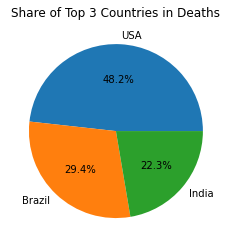

In [7]:
plt.pie(top_3_deaths_by_country, labels=top_3_deaths_by_country.index, autopct='%1.1f%%')
plt.title('Share of Top 3 Countries in Deaths')
plt.show()

In [ ]:
def get_lat(x):
    country_region = x["Country/Region"]
    lat = df_complete_1[df_complete_1["Country/Region"] == country_region]["Lat"]
    return lat.iloc[0]

In [5]:
fig = px.scatter_mapbox(
    covid_df, 
    lon = covid_df["Long"],
    lat = covid_df["Lat"],
    zoom=3,
    color=covid_df["Tot Cases/1M pop"],
    size=covid_df["Tot Cases/1M pop"],
    width=800,
    height=600,
    title="Confirmed Cases World Wide",
    text="Country/Region",
    hover_data=["Total Recovered", "Deaths/1M pop"]
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 50, "l": 0, "b": 10})

fig.show()

KeyError: 'Long'